# library Part

In [24]:
import pandas as pd 
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import  Sales Data

In [25]:
path =r"C:\Users\Goutam\OneDrive\Desktop\Pandas Project Files\Pandas-Data-Science-Tasks-master\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data"

In [26]:
l=os.listdir(path)
l

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [27]:
alldata=pd.DataFrame()
for i in l:
    df=pd.read_csv(rf'{path}\{i}')
    alldata=pd.concat([alldata,df])

alldata.info

<bound method DataFrame.info of       Order ID                     Product Quantity Ordered Price Each  \
0       176558        USB-C Charging Cable                2      11.95   
1          NaN                         NaN              NaN        NaN   
2       176559  Bose SoundSport Headphones                1      99.99   
3       176560                Google Phone                1        600   
4       176560            Wired Headphones                1      11.99   
...        ...                         ...              ...        ...   
11681   259353      AAA Batteries (4-pack)                3       2.99   
11682   259354                      iPhone                1        700   
11683   259355                      iPhone                1        700   
11684   259356      34in Ultrawide Monitor                1     379.99   
11685   259357        USB-C Charging Cable                1      11.95   

           Order Date                         Purchase Address  
0      04/19/1

#  Checking and Cleaning Part

In [28]:
alldata["temp"]=alldata['Order ID'].str.isdigit()
alldata.loc[alldata["temp"]==False]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,temp
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,False
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,False
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,False
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,False
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,False
...,...,...,...,...,...,...,...
10000,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,False
10387,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,False
11399,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,False
11468,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,False


In [29]:
# drop all null values
alldata=alldata.loc[alldata['temp']==True]
alldata=alldata.dropna().drop("temp",axis=1)
alldata

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


# Now change datatype related columns


In [30]:
alldata['Order ID'] = pd.to_numeric(alldata['Order ID'])
alldata['Quantity Ordered'] = pd.to_numeric(alldata['Quantity Ordered'])
alldata['Price Each'] = pd.to_numeric(alldata['Price Each'])
alldata['Order Date'] = pd.to_datetime(alldata['Order Date'])

In [31]:
alldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  int64         
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 9.9+ MB


# Taking Insites with Visualization


In [32]:
# 1.) What was the best month for sales? How much was earned that month?
# First we take a total sale values or  ammount and month columns
alldata['tsv']=alldata['Price Each']*alldata['Quantity Ordered']
alldata['month']=alldata['Order Date'].dt.month_name()
alldata[['month','tsv']]

,month,tsv
0,April,23.90
2,April,99.99
3,April,600.00
4,April,11.99
5,April,11.99
...,...,...
11681,September,8.97
11682,September,700.00
11683,September,700.00
11684,September,379.99


In [33]:
best_month_sale=alldata.groupby('month')['tsv'].sum()
best_month_sale=best_month_sale.sort_values()

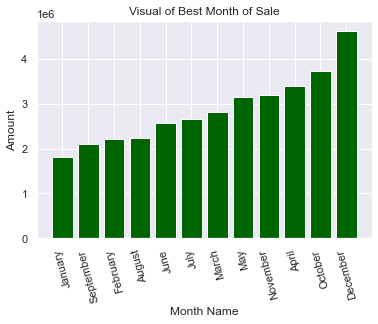

In [34]:
# Check By Visual 
import matplotlib.pyplot as plt
plt.bar(best_month_sale.index,best_month_sale.values,color='darkgreen')
plt.title("Visual of Best Month of Sale")
plt.xlabel("Month Name")
plt.ylabel("Amount")
plt.xticks(rotation=105)
plt.show()

In [35]:
# plotlygraph
import plotly
import plotly.graph_objs as go

graph1=[go.Bar(
        x=best_month_sale.index,
        y=best_month_sale.values
)]
plotly.offline.iplot(graph1)

In [36]:
#2.) What city sold the most product?
# first we exract city column from address column
alldata['city']=alldata['Purchase Address'].str.split(',',expand=True)[1]
alldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 11685
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  int64         
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   tsv               185950 non-null  float64       
 7   month             185950 non-null  object        
 8   city              185950 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 14.2+ MB


In [37]:
city_product=alldata.groupby('city')['Quantity Ordered'].sum()
city_product=city_product.sort_values()
graph2=[go.Bar(x=city_product.index,y=city_product.values)]
plotly.offline.iplot(graph2)

In [38]:
# 3. ) What time should we display advertisemens to maximize the likelihood of customer’s buying product?
#To work on time, we must convert Order Date in Date Time Format.
alldata['Hour']=alldata['Order Date'].dt.hour
alldata['Minute']=alldata['Order Date'].dt.minute
alldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 11685
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  int64         
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   tsv               185950 non-null  float64       
 7   month             185950 non-null  object        
 8   city              185950 non-null  object        
 9   Hour              185950 non-null  int64         
 10  Minute            185950 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 17.0+ MB


In [39]:
time_ads=alldata.groupby("Hour")["tsv"].sum()
time_ads=time_ads.sort_values(ascending=0)
time_ads

Hour
19    2412938.54
12    2316821.34
11    2300610.24
20    2281716.24
18    2219348.30
13    2155389.80
17    2129361.61
14    2083672.73
21    2042000.86
10    1944286.77
15    1941549.60
16    1904601.31
9     1639030.58
22    1607549.21
8     1192348.97
23    1179304.44
7      744854.12
0      713721.27
1      460866.88
6      448113.00
2      234851.44
5      230679.82
4      162661.01
3      145757.89
Name: tsv, dtype: float64

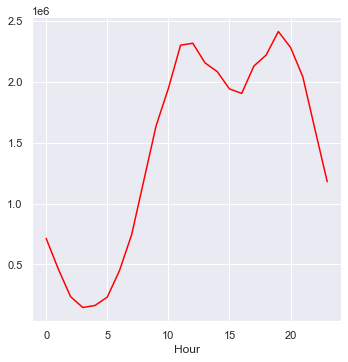

In [40]:
sns.relplot(x=time_ads.index,y=time_ads.values,color='red',kind="line")

In [41]:
keys=[pair for pair,df in alldata.groupby(['Hour'])]# faltu kam h ye
np.array(keys)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

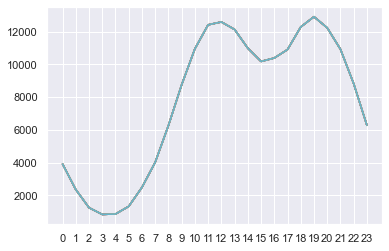

In [42]:
plt.plot(keys,alldata.groupby("Hour").count())
plt.grid()
plt.xticks(keys)
plt.grid()
plt.show()

In [43]:
# 4.) What product sold the most? Why do you think it sold the most?
max_productSale=alldata.groupby('Product')['Quantity Ordered'].sum()
max_productSale=max_productSale.sort_values(ascending=0)

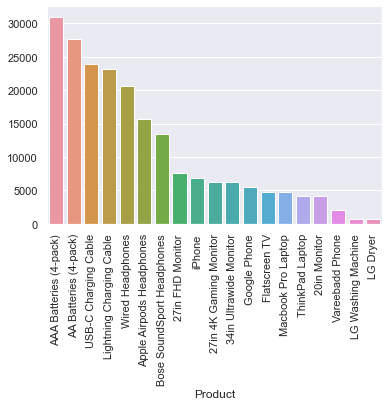

In [44]:
import seaborn as sns
sns.set_theme(context="notebook", style="darkgrid", palette="deep")
sns.barplot(x=max_productSale.index,y=max_productSale.values)
plt.xticks(rotation=90)
plt.show()

In [50]:
## 5.) What product sold the most? Why do you think it sold the most?
alldata=alldata.sort_values(['Order ID',"Price Each"],ascending=[1,0])
alldata["Groupid"]=alldata.groupby("Order ID")["Product"].transform(lambda x:(",").join(x))

In [63]:
alldata.sample(15)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,tsv,month,city,Hour,Minute,Groupid
14338,175706,AAA Batteries (4-pack),1,2.99,2019-03-27 11:41:00,"300 Main St, San Francisco, CA 94016",2.99,March,San Francisco,11,41,AAA Batteries (4-pack)
14637,175991,AAA Batteries (4-pack),1,2.99,2019-03-23 11:48:00,"29 Cherry St, Los Angeles, CA 90001",2.99,March,Los Angeles,11,48,AAA Batteries (4-pack)
18457,313294,USB-C Charging Cable,1,11.95,2019-12-10 11:50:00,"990 Elm St, San Francisco, CA 94016",11.95,December,San Francisco,11,50,USB-C Charging Cable
11917,290183,Wired Headphones,1,11.99,2019-11-11 14:18:00,"233 Johnson St, New York City, NY 10001",11.99,November,New York City,14,18,Wired Headphones
11770,306887,Wired Headphones,1,11.99,2019-12-20 12:10:00,"598 Hickory St, San Francisco, CA 94016",11.99,December,San Francisco,12,10,Wired Headphones
696,194755,Vareebadd Phone,1,400.00,2019-05-08 12:44:00,"681 Ridge St, Boston, MA 02215",400.00,May,Boston,12,44,Vareebadd Phone
16644,311575,Bose SoundSport Headphones,1,99.99,2019-12-07 12:26:00,"301 2nd St, San Francisco, CA 94016",99.99,December,San Francisco,12,26,Bose SoundSport Headphones
7348,183565,34in Ultrawide Monitor,1,379.99,2019-04-30 16:39:00,"929 7th St, New York City, NY 10001",379.99,April,New York City,16,39,34in Ultrawide Monitor
3317,251333,Flatscreen TV,1,300.00,2019-09-15 05:50:00,"626 Forest St, Seattle, WA 98101",300.00,September,Seattle,5,50,Flatscreen TV
9104,268044,Lightning Charging Cable,1,14.95,2019-10-13 08:27:00,"586 12th St, Seattle, WA 98101",14.95,October,Seattle,8,27,Lightning Charging Cable


# Modules
from itertools import combinations
from collections import Counter
count=Counter()

In [76]:
row_list=[]
for row in alldata["Groupid"]:
        row_list=row.split(',')
        count.update(Counter(combinations(row_list,2)))
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 8644),
 (('Google Phone', 'USB-C Charging Cable'), 8560),
 (('iPhone', 'Wired Headphones'), 4080),
 (('Google Phone', 'Wired Headphones'), 3880),
 (('iPhone', 'Apple Airpods Headphones'), 3300),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 3152),
 (('Wired Headphones', 'USB-C Charging Cable'), 2188),
 (('Google Phone', 'Bose SoundSport Headphones'), 2076),
 (('Google Phone', 'Wired Headphones', 'USB-C Charging Cable'), 1390),
 (('Vareebadd Phone', 'Wired Headphones'), 1356)]

In [77]:
row_list1=[]
for row in alldata["Groupid"]:
        row_list1=row.split(',')
        count.update(Counter(combinations(row_list1,3)))
count.most_common(50)

[(('iPhone', 'Lightning Charging Cable'), 8644),
 (('Google Phone', 'USB-C Charging Cable'), 8560),
 (('iPhone', 'Wired Headphones'), 4080),
 (('Google Phone', 'Wired Headphones'), 3880),
 (('iPhone', 'Apple Airpods Headphones'), 3300),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 3152),
 (('Wired Headphones', 'USB-C Charging Cable'), 2188),
 (('Google Phone', 'Bose SoundSport Headphones'), 2076),
 (('Google Phone', 'Wired Headphones', 'USB-C Charging Cable'), 1668),
 (('Vareebadd Phone', 'Wired Headphones'), 1356),
 (('Lightning Charging Cable', 'Wired Headphones'), 1312),
 (('iPhone', 'Lightning Charging Cable', 'Wired Headphones'), 1176),
 (('Apple Airpods Headphones', 'Lightning Charging Cable'), 1136),
 (('Bose SoundSport Headphones', 'USB-C Charging Cable'), 1044),
 (('Apple Airpods Headphones', 'Wired Headphones'), 940),
 (('iPhone', 'Apple Airpods Headphones', 'Lightning Charging Cable'), 876),
 (('Lightning Charging Cable', 'AA Batteries (4-pack)'), 864),
 (('Lightning Charg

In [78]:
alldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 25116
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  int64         
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   tsv               185950 non-null  float64       
 7   month             185950 non-null  object        
 8   city              185950 non-null  object        
 9   Hour              185950 non-null  int64         
 10  Minute            185950 non-null  int64         
 11  Groupid           185950 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 18.4+ MB
